In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [17]:
# Đọc dữ liệu
file_path = "data/10kmau2010.csv" 
df = pd.read_csv(file_path)

# Hiển thị thông tin cơ bản
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9399 entries, 0 to 9398
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ttnt             9399 non-null   int64 
 1   dantoc           9399 non-null   int64 
 2   tsnguoi          9399 non-null   int64 
 3   thunhap          9399 non-null   int64 
 4   chitieu          9399 non-null   int64 
 5   chinangluong     9399 non-null   int64 
 6   chitiendien      9399 non-null   int64 
 7   dienticho        9390 non-null   object
 8   chatluongo       9399 non-null   int64 
 9   tiepcandienluoi  9399 non-null   int64 
 10  chitiendienbq    9399 non-null   int64 
 11  thunhapbq        9399 non-null   int64 
 12  chinangluongbq   9399 non-null   int64 
 13  chitieubq        9399 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 1.0+ MB


,ttnt,dantoc,tsnguoi,thunhap,chitieu,chinangluong,chitiendien,dienticho,chatluongo,tiepcandienluoi,chitiendienbq,thunhapbq,chinangluongbq,chitieubq
0,1,1,3,8655550,517176,78822,39000,660,4,1,13000,2885183,26274,172392
1,1,1,4,2140093,823824,34368,2640,200,4,1,660,535023,8592,205956
2,1,1,2,1065400,255480,2680,2500,120,3,1,1250,532700,1340,127740
3,1,1,2,900141,41616,1124,600,200,1,1,300,450071,562,20808
4,1,1,5,1985334,836700,274425,20400,120,4,1,4080,397067,54885,167340


In [19]:
missing_values = df.isnull().sum()
print("Số lượng giá trị thiếu trong từng cột:\n", missing_values)

Số lượng giá trị thiếu trong từng cột:
 ttnt               0
dantoc             0
tsnguoi            0
thunhap            0
chitieu            0
chinangluong       0
chitiendien        0
dienticho          9
chatluongo         0
tiepcandienluoi    0
chitiendienbq      0
thunhapbq          0
chinangluongbq     0
chitieubq          0
dtype: int64


In [21]:
# Xử lý cột 'dienticho': chuyển thành số, loại bỏ giá trị không hợp lệ
df['dienticho'] = pd.to_numeric(df['dienticho'], errors='coerce')

# Điền giá trị thiếu trong 'dienticho' bằng trung vị
df['dienticho'].fillna(df['dienticho'].median(), inplace=True)

# Kiểm tra lại dữ liệu sau khi xử lý
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9399 entries, 0 to 9398
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ttnt             9399 non-null   int64  
 1   dantoc           9399 non-null   int64  
 2   tsnguoi          9399 non-null   int64  
 3   thunhap          9399 non-null   int64  
 4   chitieu          9399 non-null   int64  
 5   chinangluong     9399 non-null   int64  
 6   chitiendien      9399 non-null   int64  
 7   dienticho        9399 non-null   float64
 8   chatluongo       9399 non-null   int64  
 9   tiepcandienluoi  9399 non-null   int64  
 10  chitiendienbq    9399 non-null   int64  
 11  thunhapbq        9399 non-null   int64  
 12  chinangluongbq   9399 non-null   int64  
 13  chitieubq        9399 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 1.0 MB


C:\Users\84388\AppData\Local\Temp\ipykernel_16252\3059756849.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['dienticho'].fillna(df['dienticho'].median(), inplace=True)


In [23]:
# Chọn các biến quan trọng để phân cụm
features = ['chinangluong', 'chitiendien', 'tiepcandienluoi', 'chitiendienbq', 
            'chinangluongbq', 'thunhap', 'thunhapbq', 'tsnguoi', 'ttnt', 'dantoc', 'dienticho']

# Áp dụng Min-Max Scaling để chuẩn hóa dữ liệu
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[features]), columns=features)

# Hiển thị dữ liệu đã chuẩn hóa
df_scaled.head()

,chinangluong,chitiendien,tiepcandienluoi,chitiendienbq,chinangluongbq,thunhap,thunhapbq,tsnguoi,ttnt,dantoc,dienticho
0,0.180921,0.139286,1.0,0.232143,0.361841,1.000000,1.000000,0.142857,1.0,0.0,1.000000
1,0.078885,0.009429,1.0,0.011786,0.118328,0.247153,0.185285,0.214286,1.0,0.0,0.298780
2,0.006151,0.008929,1.0,0.022321,0.018454,0.122974,0.184480,0.071429,1.0,0.0,0.176829
3,0.002580,0.002143,1.0,0.005357,0.007740,0.103879,0.155835,0.071429,1.0,0.0,0.298780
4,0.629889,0.072857,1.0,0.072857,0.755867,0.229271,0.137460,0.285714,1.0,0.0,0.176829


In [25]:

pca = PCA(n_components=0.95)  
df_pca = pca.fit_transform(df_scaled)

num_components = df_pca.shape[1]
print(f"Số thành phần PCA giữ lại: {num_components}")

Số thành phần PCA giữ lại: 3


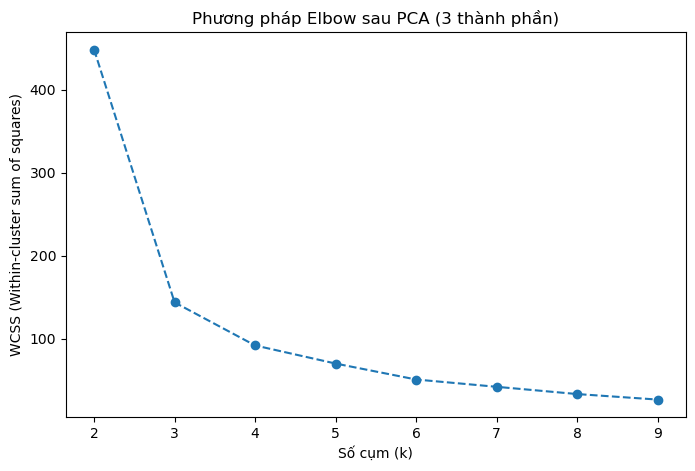

In [27]:
wcss_pca = []
K_range = range(2, 10)

for k in K_range:
    kmeans_pca = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_pca.fit(df_pca)
    wcss_pca.append(kmeans_pca.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, wcss_pca, marker='o', linestyle='--')
plt.xlabel("Số cụm (k)")
plt.ylabel("WCSS (Within-cluster sum of squares)")
plt.title(f"Phương pháp Elbow sau PCA ({num_components} thành phần)")
plt.show()

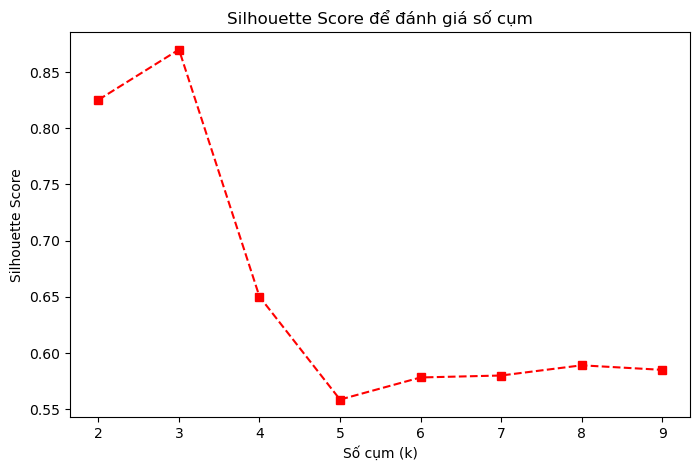

In [28]:
silhouette_scores = []
for k in K_range:
    kmeans_pca = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_pca = kmeans_pca.fit_predict(df_pca)
    silhouette_scores.append(silhouette_score(df_pca, labels_pca))

# Vẽ biểu đồ Silhouette Score để đánh giá số cụm
plt.figure(figsize=(8,5))
plt.plot(K_range, silhouette_scores, marker='s', linestyle='--', color='r')
plt.xlabel("Số cụm (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score để đánh giá số cụm")
plt.show()

In [29]:
# Chọn số cụm tối ưu từ Elbow Method và Silhouette Score
optimal_k_pca = 3
kmeans_final = KMeans(n_clusters=optimal_k_pca, random_state=42, n_init=10)
df_scaled["Cluster_PCA"] = kmeans_final.fit_predict(df_pca)

# Thống kê số lượng hộ gia đình trong từng cụm
print("Số lượng hộ gia đình trong từng cụm:")
print(df_scaled["Cluster_PCA"].value_counts())

Số lượng hộ gia đình trong từng cụm:
Cluster_PCA
0    6431
1    2644
2     324
Name: count, dtype: int64


In [30]:
# Ghép lại với dữ liệu gốc để phân tích
df['Cluster_PCA'] = df_scaled["Cluster_PCA"]

# Trung bình các biến trong từng cụm
cluster_summary = df.groupby("Cluster_PCA")[features].mean()
print("Trung bình các biến theo từng cụm:")
print(cluster_summary)

Trung bình các biến theo từng cụm:
             chinangluong  chitiendien  tiepcandienluoi  chitiendienbq  \
Cluster_PCA                                                              
0            10836.366972   860.178821              1.0     235.276784   
1            18383.947428  2170.717852              1.0     600.966717   
2             9675.237654    40.725309              0.0       9.623457   

             chinangluongbq        thunhap     thunhapbq   tsnguoi      ttnt  \
Cluster_PCA                                                                    
0               2238.400560   53693.942622  14448.749339  3.949930  0.000000   
1               3919.026853  102965.880862  28768.905068  3.818457  1.000000   
2               1772.521605   29780.783951   8068.527778  4.632716  0.027778   

               dantoc  dienticho  
Cluster_PCA                       
0            2.323900  66.002488  
1            1.365356  81.558623  
2            7.885802  52.209877  


Số lượng hộ gia đình trong từng cụm:
Cluster_PCA
0    6431
1    2644
2     324
Name: count, dtype: int64


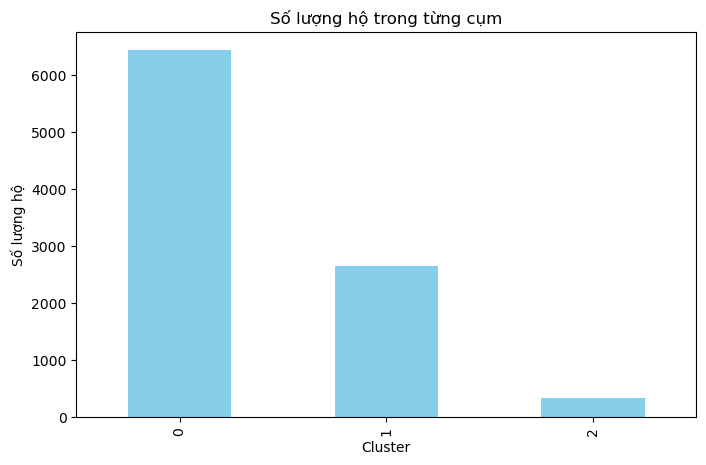

In [31]:
# Thống kê số lượng hộ gia đình trong từng cụm
cluster_counts = df['Cluster_PCA'].value_counts().sort_index()

print("Số lượng hộ gia đình trong từng cụm:")
print(cluster_counts)

# Vẽ biểu đồ số lượng hộ trong từng cụm
plt.figure(figsize=(8,5))
cluster_counts.plot(kind='bar', color='skyblue')
plt.xlabel("Cluster")
plt.ylabel("Số lượng hộ")
plt.title("Số lượng hộ trong từng cụm")
plt.show()

Đặc điểm kinh tế của từng cụm:
                   thunhap     thunhapbq       chitieu     chitieubq
Cluster_PCA                                                         
0             53693.942622  14448.749339  46345.946198  12485.446742
1            102965.880862  28768.905068  81004.225416  22400.015129
2             29780.783951   8068.527778  28845.333333   7266.555556


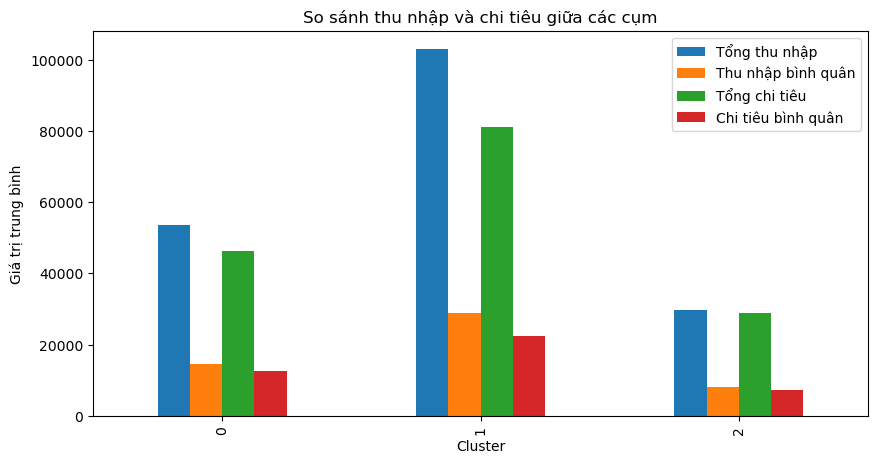

In [32]:
# Tính thu nhập và chi tiêu trung bình trong từng cụm
economic_summary = df.groupby("Cluster_PCA")[['thunhap', 'thunhapbq', 'chitieu', 'chitieubq']].mean()

print("Đặc điểm kinh tế của từng cụm:")
print(economic_summary)

# Vẽ biểu đồ so sánh thu nhập và chi tiêu trung bình giữa các cụm
economic_summary.plot(kind="bar", figsize=(10,5))
plt.xlabel("Cluster")
plt.ylabel("Giá trị trung bình")
plt.title("So sánh thu nhập và chi tiêu giữa các cụm")
plt.legend(["Tổng thu nhập", "Thu nhập bình quân", "Tổng chi tiêu", "Chi tiêu bình quân"])
plt.show()

Mức tiêu thụ năng lượng trong từng cụm:
             chinangluong  chinangluongbq  chitiendien  chitiendienbq
Cluster_PCA                                                          
0            10836.366972     2238.400560   860.178821     235.276784
1            18383.947428     3919.026853  2170.717852     600.966717
2             9675.237654     1772.521605    40.725309       9.623457


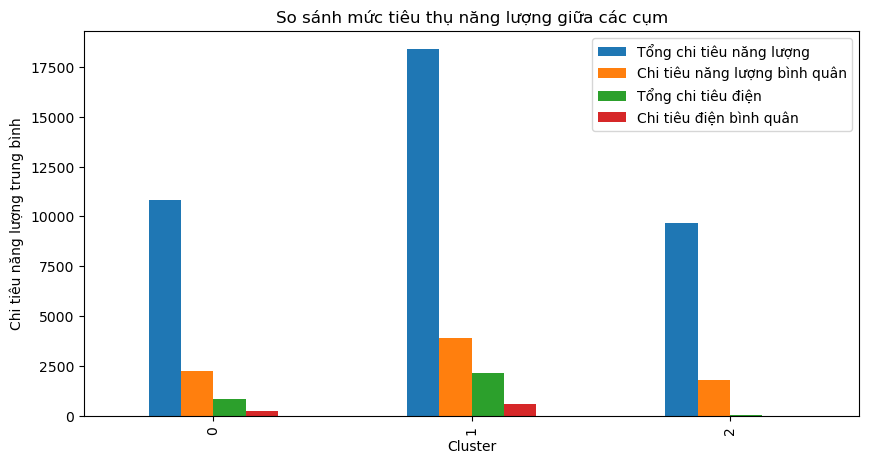

In [33]:
# Tính mức tiêu thụ năng lượng trung bình trong từng cụm
energy_summary = df.groupby("Cluster_PCA")[['chinangluong', 'chinangluongbq', 'chitiendien', 'chitiendienbq']].mean()

print("Mức tiêu thụ năng lượng trong từng cụm:")
print(energy_summary)

# Vẽ biểu đồ so sánh tiêu thụ năng lượng giữa các cụm
energy_summary.plot(kind="bar", figsize=(10,5))
plt.xlabel("Cluster")
plt.ylabel("Chi tiêu năng lượng trung bình")
plt.title("So sánh mức tiêu thụ năng lượng giữa các cụm")
plt.legend(["Tổng chi tiêu năng lượng", "Chi tiêu năng lượng bình quân", "Tổng chi tiêu điện", "Chi tiêu điện bình quân"])
plt.show()

Tỷ lệ hộ có tiếp cận điện lưới trong từng cụm (%):
Cluster_PCA
0    100.0
1    100.0
2      0.0
Name: tiepcandienluoi, dtype: float64


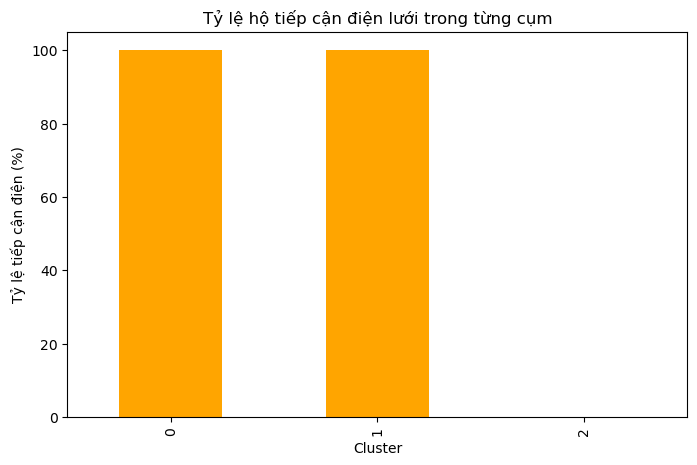

In [34]:
# Tính tỷ lệ hộ có tiếp cận điện lưới trong từng cụm
electricity_access = df.groupby("Cluster_PCA")["tiepcandienluoi"].mean() * 100

print("Tỷ lệ hộ có tiếp cận điện lưới trong từng cụm (%):")
print(electricity_access)

# Vẽ biểu đồ tỷ lệ tiếp cận điện lưới
plt.figure(figsize=(8,5))
electricity_access.plot(kind="bar", color="orange")
plt.xlabel("Cluster")
plt.ylabel("Tỷ lệ tiếp cận điện (%)")
plt.title("Tỷ lệ hộ tiếp cận điện lưới trong từng cụm")
plt.show()

Tỷ lệ hộ dân tộc thiểu số trong từng cụm (%):
Cluster_PCA
0    0.0
1    0.0
2    0.0
Name: dantoc, dtype: float64

Tỷ lệ hộ nông thôn trong từng cụm (%):
Cluster_PCA
0    100.000000
1      0.000000
2     97.222222
Name: ttnt, dtype: float64


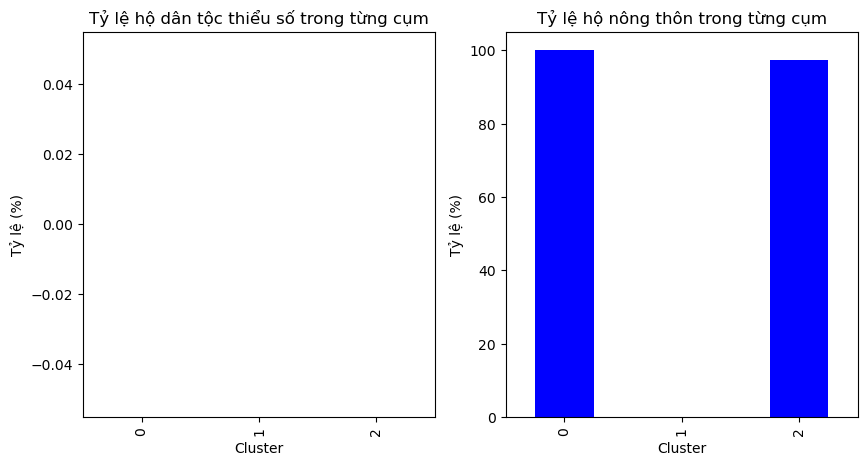

In [35]:
# Tính tỷ lệ hộ dân tộc thiểu số và hộ nông thôn trong từng cụm
ethnic_ratio = df.groupby("Cluster_PCA")["dantoc"].apply(lambda x: (x == 0).mean() * 100)
rural_ratio = df.groupby("Cluster_PCA")["ttnt"].apply(lambda x: (x == 0).mean() * 100)

print("Tỷ lệ hộ dân tộc thiểu số trong từng cụm (%):")
print(ethnic_ratio)

print("\nTỷ lệ hộ nông thôn trong từng cụm (%):")
print(rural_ratio)

# Vẽ biểu đồ
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
ethnic_ratio.plot(kind="bar", color="green")
plt.xlabel("Cluster")
plt.ylabel("Tỷ lệ (%)")
plt.title("Tỷ lệ hộ dân tộc thiểu số trong từng cụm")

plt.subplot(1, 2, 2)
rural_ratio.plot(kind="bar", color="blue")
plt.xlabel("Cluster")
plt.ylabel("Tỷ lệ (%)")
plt.title("Tỷ lệ hộ nông thôn trong từng cụm")

plt.show()

Đặc điểm hộ gia đình trong từng cụm:
              tsnguoi  dienticho
Cluster_PCA                     
0            3.949930  66.002488
1            3.818457  81.558623
2            4.632716  52.209877


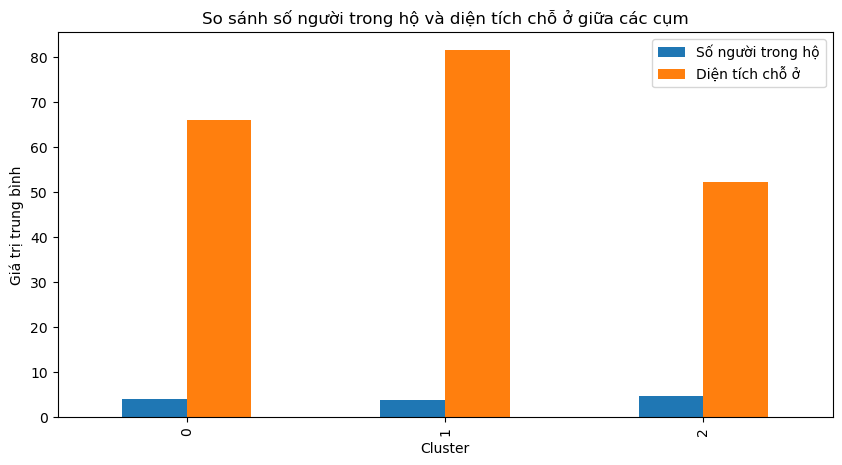

In [36]:
# Tính số người trung bình trong hộ và diện tích chỗ ở trong từng cụm
household_summary = df.groupby("Cluster_PCA")[['tsnguoi', 'dienticho']].mean()

print("Đặc điểm hộ gia đình trong từng cụm:")
print(household_summary)

# Vẽ biểu đồ so sánh đặc điểm hộ gia đình giữa các cụm
household_summary.plot(kind="bar", figsize=(10,5))
plt.xlabel("Cluster")
plt.ylabel("Giá trị trung bình")
plt.title("So sánh số người trong hộ và diện tích chỗ ở giữa các cụm")
plt.legend(["Số người trong hộ", "Diện tích chỗ ở"])
plt.show()

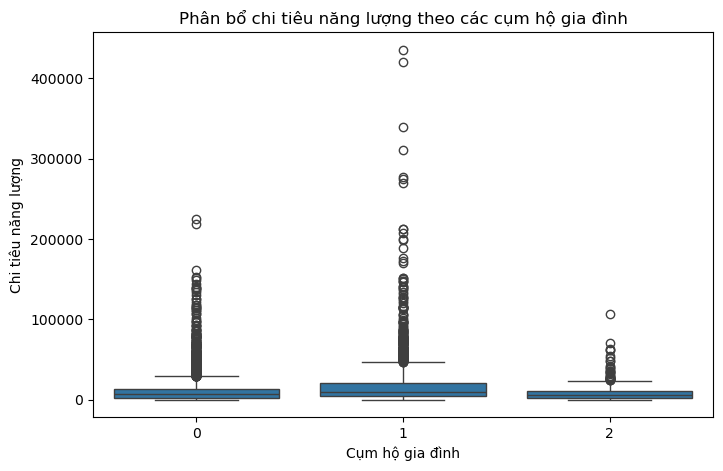

In [39]:
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Cluster_PCA', y='chinangluong')
plt.title("Phân bổ chi tiêu năng lượng theo các cụm hộ gia đình")
plt.xlabel("Cụm hộ gia đình")
plt.ylabel("Chi tiêu năng lượng")
plt.show()